# 逻辑回归Logistics Regression

请把下面的点分成两类：

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("data/logistics.xlsx")

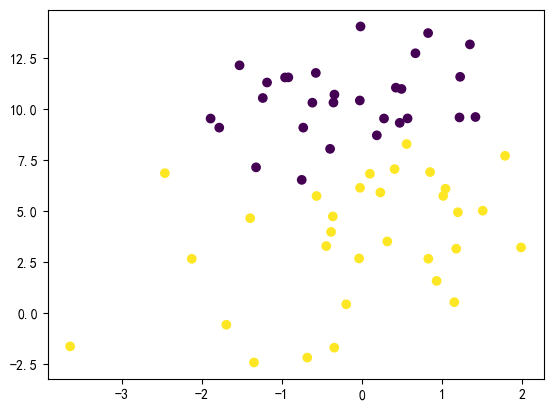

In [18]:
plt.scatter(data['x_1'], data['x_2'], c=data['y'])

In [19]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100).fit(data[["x_1","x_2"]], data['y'])
lr_model.intercept_

array([11.90647365])

In [20]:
lr_model.coef_

array([[ 0.66398382, -1.55007315]])

直线方程的一般式：
$$
x_1 w_1 + x_2 w_2 + x_3 w_3 = 0
$$

其中$x_3=1$

#### 直线方程的斜截式：
$$
x_2 = - (w_1 x_1 + w_3)/ w_2
x_2 = - (w_1/w_2) x_1 - w_3/w_2
$$

In [21]:
import numpy as np
x1 = np.linspace(-4, 2)
k = - (lr_model.coef_[0][0] / lr_model.coef_[0][1]) 
b = - lr_model.intercept_ /lr_model.coef_[0][1]  
print(k, b)
x2 = k  * x1  +b

0.42835644512450094 [7.68123341]


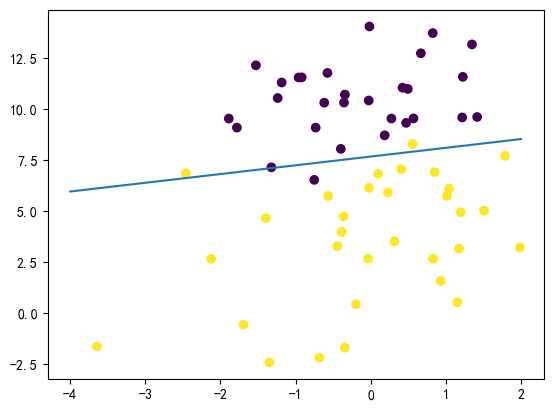

In [22]:
plt.plot(x1, x2)
plt.scatter(data['x_1'], data['x_2'], c=data['y'])

简写成向量的形式为
$$
X^TW = 0
$$

上述直线上的点代入到方程$W^TX$中，会使其为零；  
分散在直线两侧的点代入到方程中，一侧值>0, 一侧值<0;  
我们可以通过如下方法将值映射到某区间内：

## 阶跃函数

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def step_fun(x):
    x[x>0] = 1
    x[x<=0] = 0
    return x

x = np.linspace(-5, 5, 100)
y = step_fun(x.copy())

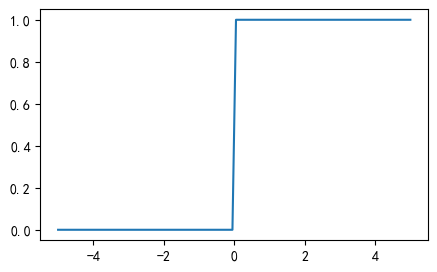

In [24]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.plot(x,y)

## Sigmoid函数

逻辑回归中对应一条非常重要的曲线S型曲线，对应的函数是Sigmoid函数：
$$
f(x) = \frac{1}{1 + e^{-x}}
$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(c):
    return 1/(1 + np.exp(-c))
x = np.linspace(-5,5,100)
y = sigmoid(x)

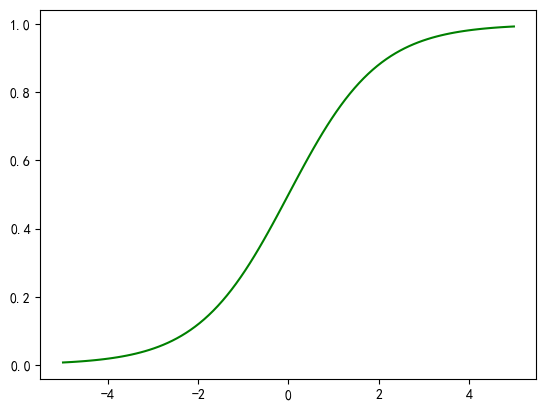

In [26]:
plt.plot(x,y,color = 'green')

## 逻辑回归

距离分离直线越远，取值越接近于0或1;  
距离分离直线越近，取值越接近于0.5；  


$$
y = f(X^TW) = \frac{1}{1 + e^{-X^TW}}
$$

其中$x=X^TW$

 $f(x)$值域为（0,1），可将$f(x)$看成是一个关于$x$的概率分布

对于每一个样本观测值，我们期望将其代入上述复合函数后：  
**正类**：  
$y=f(x)$的值越大越好，即取值越接近于1越好；  
即
$$
\prod^{o} f(x_i) , i \in 正类
$$
**负类**：  
$y=f(x)$的值越小越好，即取值越接近于0越好；
$$
\prod^{p} f(x_i) , i \in 负类
$$

对于负类，也改成求最大值；
$$
\prod^{p} (1-f(x_i)), i \in 负类
$$

两种情况结合，构造成如下似然函数：

$$
J= argmax_w \prod^{o} f(x_i)^{y_i}  * \prod^{p} [(1-f(x_i))^{1-y_i}]
$$

$$
J=argmax_w ln(\prod_{i=1}^{n} f(x_i)^{y_i}   [(1-f(x_i))^{1-y_i}])
$$

指数化对数，累乘转成累加

$$
J = argmax_w( \sum_{i=1}^{n} [y_i ln f(x_i) + (1-y_i) ln (1- f(x_i))]) 
$$

$$
J = argmax_w( \sum_{i=1}^{n} [y_i ln f(x_i) + ln(1- f(x_i)) -y_i ln (1-f(x_i))]) 
$$

提取第一三项中的$y_i$

$$
J = argmax_w( \sum_{i=1}^{n} [y_i(ln f(x_i)  - ln(1- f(x_i)) + ln (1-f(x_i))]) 
$$

$$
J = argmax_w( \sum_{i=1}^{n} [y_i ln\frac{f(x_i)}{1-f(x_i)} + ln(1- f(x_i))]) 
$$

### 第一项
$$
 ln \frac{f(x_i)}{1-f(x_i)} 是什么
$$

$$
y = f(x) =\frac{1}{1+e^{-X^TW}}
$$

$$
\frac{1}{y} = 1+ e^{-X^TW}
$$

$$
\frac{1}{y} - 1 = e^{-X^TW}
$$

$$
\frac{1-y}{y} = e^{-X^TW}
$$

$$
\frac{y}{1-y} = \frac{1}{e^{-X^TW}}
$$

$$
\frac{y}{1-y} = e^{X^TW}
$$

$$
ln \frac{y}{1-y} = X^TW
$$

### 第二项
$$
ln (1-f(x_i)) = 是什么？
$$

$$
1-y = 1- \frac{1}{1+e^{-X^TW}}
$$

$$
1-y = \frac{1+e^{-X^TW}}{1+e^{-X^TW}} - \frac{1}{1+e^{-X^TW}}
$$

$$
1-y = \frac{e^{-X^W}}{1+e^{-X^TW}}
$$

分子分母同时乘以$e^{WX}$

$$
1-y=\frac{e^{-X^TW}  e^{X^TW}} { (1+ e^{-X^TW}) e^{X^TW}}
$$

$$
 1-y= \frac{1} {e^{X^TW}+1}
$$

$$
ln(1-f(x_i)) = ln(\frac{1}{e^{X^TW} +1})
$$

$$
= - ln({e^{X^TW} +1})
$$

## 损失函数：
$$
J = argmax_w( \sum_{i=1}^{n} [y_i ln\frac{f(x_i)}{1-f(x_i)} + ln(1- f(x_i))]) 
$$

$$
J = argmax_w( \sum_{i=1}^{n} [y_i X^TW  - ln (e^{X^TW}+1)]) 
$$

将求极大值改为，求取得极小值时，所对应的的参数$\omega$

$$
J = argmim_w( \sum_{i=1}^{n} [-y_i X^TW  + ln (e^{X^TW}+1)]) 
$$

$$
J = argmim_w( \sum_{i=1}^{n} [-y_i (w_1 x_1 + w_2 x_2 + b)  + ln (e^{(w_1 x_1 + w_2 x_2 + b)}+1)]) 
$$

观察上式，可以发现，损失函数是一个三元函数，有三个未知变量$w_1, w_2, b$需要求解，使用梯度下降法求解时，题目变成了三元函数中梯度下降。（这种情况下，损失函数不再是一个二元函数的3D图像了。）

$$
\frac{\partial J}{\partial W} = \sum_{i=1}^{n} [-y_i X + \frac{1}{e^{X^TW}+1} · e^{X^TW} ·X]
$$

$$
\frac{\partial J}{\partial W} = \sum_{i=1}^{n} [-y_i X + \frac{1}{1+e^{-X^TW}} ·X]
$$

$$
\frac{\partial J}{\partial W} = \sum_{i=1}^{n} [X( \frac{1}{1+e^{-X^TW}} -y_i )]
$$

其中，$\frac{1}{1+e^{-X^TW}}$ 为原复合函数，即预测值$\hat{y}$.

对$w_3$求导时，$x_3=1$, $X = 1$ 

$$
\frac{\partial J}{\partial b} =  \sum_{i=1}^{n} [( \frac{1}{1+e^{-X^TW}} -y_i )]
$$

使用梯度下降法，偏导数更新公式为：

$$
\frac{\partial J}{\partial W} = \frac{\partial J}{\partial W}  - \eta \sum_{i=1}^{n} [X( \frac{1}{1+e^{-X^TW}} -y_i )]
$$

$$
\frac{\partial J}{\partial b} = \frac{\partial J}{\partial b}  - \eta \sum_{i=1}^{n} [( \frac{1}{1+e^{-X^TW}} -y_i )]
$$

## 逻辑回归梯度下降求解

In [50]:
import numpy as np
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        for _ in range(self.num_iterations):
            # Compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return (predictions >= 0.5).astype(int)

In [51]:
# 创建逻辑回归模型实例并训练
model = LogisticRegression(learning_rate=0.001, num_iterations=100000)
model.fit(data[['x_1','x_2']], data['y'])
print(model.weights)
print(model.bias)

[ 0.51281842 -0.74796296]
5.4344429538192065


直线方程的一般式：
$$
x_1 w_1 + x_2 w_2 + x_3 w_3 = 0
$$

直线方程的斜截式：
$$
x_2 = - (w_1 x_1 + w_3)/ w_2
x_2 = - (w_1/w_2) x_1 - w_3/w_2
$$

0.6856200746185017 7.2656578175591315


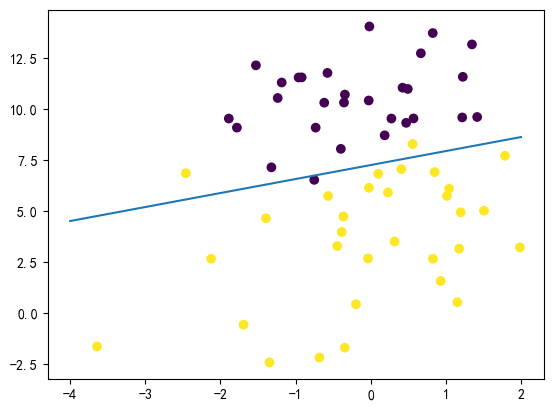

In [36]:
import numpy as np
x1 = np.linspace(-4, 2)
k = - (model.weights[0] / model.weights[1]) 
b = - model.bias / model.weights[1]
print(k, b)
x2 = k  * x1  + b
plt.plot(x1, x2)
plt.scatter(data['x_1'], data['x_2'], c=data['y'])